In [1]:
from multirnn import MultiRNN
import pandas as pd

In [2]:
df = pd.read_csv("data/energydata_complete.csv", index_col=0, parse_dates=True)
df.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [3]:
# scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)

pd.DataFrame(scaled_data, columns=df.columns).describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,0.081958,0.054312,0.517061,0.364271,0.308303,0.561170,0.421038,0.489601,0.518499,0.485143,...,0.478234,0.512655,0.399089,0.609828,0.733558,0.288554,0.574321,0.468810,0.499742,0.499742
std,0.095818,0.113371,0.169595,0.109512,0.159412,0.114438,0.166676,0.152107,0.184044,0.185289,...,0.209647,0.171833,0.170978,0.172080,0.196067,0.175087,0.181457,0.189803,0.289984,0.289984
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.037383,0.000000,0.419219,0.283735,0.195542,0.490299,0.298272,0.380122,0.399099,0.335894,...,0.323621,0.386313,0.278671,0.503101,0.609649,0.142857,0.430769,0.339367,0.249895,0.249895
50%,0.046729,0.000000,0.507920,0.347675,0.283499,0.563408,0.407112,0.456302,0.501502,0.458387,...,0.468262,0.485651,0.383173,0.623256,0.785088,0.261905,0.600000,0.453997,0.497934,0.497934
75%,0.084112,0.000000,0.613516,0.441519,0.392537,0.641016,0.505982,0.607260,0.630631,0.618722,...,0.594173,0.627956,0.495445,0.735659,0.890351,0.392857,0.600000,0.595777,0.751701,0.751701
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
df.index

DatetimeIndex(['2016-01-11 17:00:00', '2016-01-11 17:10:00',
               '2016-01-11 17:20:00', '2016-01-11 17:30:00',
               '2016-01-11 17:40:00', '2016-01-11 17:50:00',
               '2016-01-11 18:00:00', '2016-01-11 18:10:00',
               '2016-01-11 18:20:00', '2016-01-11 18:30:00',
               ...
               '2016-05-27 16:30:00', '2016-05-27 16:40:00',
               '2016-05-27 16:50:00', '2016-05-27 17:00:00',
               '2016-05-27 17:10:00', '2016-05-27 17:20:00',
               '2016-05-27 17:30:00', '2016-05-27 17:40:00',
               '2016-05-27 17:50:00', '2016-05-27 18:00:00'],
              dtype='datetime64[ns]', name='date', length=19735, freq=None)

In [5]:
# train test split
train = pd.DataFrame(scaled_data, index=df.index, columns=df.columns).loc[:"2016-03-30 23:50:00"]
train.tail()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-03-30 23:10:00,0.046729,0.0,0.613516,0.334098,0.300218,0.585622,0.440346,0.443683,0.549550,0.539052,...,0.552549,0.423565,0.377814,0.581395,0.890351,0.190476,0.566667,0.545249,0.103821,0.103821
2016-03-30 23:20:00,0.046729,0.0,0.606477,0.332080,0.298037,0.585622,0.440346,0.445085,0.549550,0.539052,...,0.552549,0.428808,0.376206,0.581395,0.899123,0.166667,0.533333,0.547511,0.445841,0.445841
2016-03-30 23:30:00,0.046729,0.0,0.602957,0.332080,0.293191,0.587684,0.440346,0.445085,0.546547,0.535211,...,0.552549,0.441225,0.374598,0.581395,0.907895,0.142857,0.500000,0.549774,0.948166,0.948166
2016-03-30 23:40:00,0.037383,0.0,0.602957,0.332080,0.290768,0.588715,0.440346,0.445085,0.540541,0.535211,...,0.552549,0.447020,0.372990,0.581395,0.916667,0.119048,0.466667,0.552036,0.277470,0.277470
2016-03-30 23:50:00,0.037383,0.0,0.599085,0.332080,0.285922,0.588715,0.440346,0.445085,0.540541,0.530516,...,0.552549,0.454401,0.371383,0.581395,0.925439,0.095238,0.433333,0.554299,0.429929,0.429929


In [6]:
test = pd.DataFrame(scaled_data, index=df.index, columns=df.columns).loc["2016-05-01 00:00:00":]
test.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-05-01 00:00:00,0.037383,0.0,0.465681,0.307586,0.166465,0.588715,0.498504,0.356753,0.417117,0.429791,...,0.445023,0.373896,0.299035,0.800000,0.815789,0.142857,0.600000,0.398190,0.306147,0.306147
2016-05-01 00:10:00,0.046729,0.0,0.460401,0.306830,0.166465,0.591527,0.492966,0.359869,0.414414,0.426946,...,0.441554,0.377621,0.298499,0.800388,0.820175,0.154762,0.571795,0.398944,0.224734,0.224734
2016-05-01 00:20:00,0.037383,0.0,0.458641,0.304559,0.161619,0.591527,0.498504,0.361427,0.414414,0.423816,...,0.441554,0.380657,0.297964,0.800775,0.824561,0.166667,0.543590,0.399698,0.436147,0.436147
2016-05-01 00:30:00,0.037383,0.0,0.455121,0.304559,0.159196,0.591527,0.498504,0.361427,0.414414,0.419974,...,0.445023,0.386313,0.297428,0.801163,0.828947,0.178571,0.515385,0.400452,0.940070,0.940070
2016-05-01 00:40:00,0.046729,0.0,0.455121,0.302908,0.159196,0.593214,0.498504,0.361427,0.414414,0.419974,...,0.445023,0.391832,0.296892,0.801550,0.833333,0.190476,0.487179,0.401207,0.161111,0.161111


In [7]:
test.index

DatetimeIndex(['2016-05-01 00:00:00', '2016-05-01 00:10:00',
               '2016-05-01 00:20:00', '2016-05-01 00:30:00',
               '2016-05-01 00:40:00', '2016-05-01 00:50:00',
               '2016-05-01 01:00:00', '2016-05-01 01:10:00',
               '2016-05-01 01:20:00', '2016-05-01 01:30:00',
               ...
               '2016-05-27 16:30:00', '2016-05-27 16:40:00',
               '2016-05-27 16:50:00', '2016-05-27 17:00:00',
               '2016-05-27 17:10:00', '2016-05-27 17:20:00',
               '2016-05-27 17:30:00', '2016-05-27 17:40:00',
               '2016-05-27 17:50:00', '2016-05-27 18:00:00'],
              dtype='datetime64[ns]', name='date', length=3853, freq=None)

In [8]:
# create datasets, one for each column,
# keep the index.

# create dict to store datasets
datasets = {
    "train" : {col:train[col] for col in train.columns},
    "test" : {col:test[col] for col in test.columns}
}

datasets["train"].keys() # same as df.columns

dict_keys(['Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'rv1', 'rv2'])

In [9]:
pd.DataFrame(datasets["train"]["lights"]).tail()

,lights
date,
2016-03-30 23:10:00,0.0
2016-03-30 23:20:00,0.0
2016-03-30 23:30:00,0.0
2016-03-30 23:40:00,0.0
2016-03-30 23:50:00,0.0


In [10]:
pd.DataFrame(datasets["test"]["lights"]).head()

,lights
date,
2016-05-01 00:00:00,0.0
2016-05-01 00:10:00,0.0
2016-05-01 00:20:00,0.0
2016-05-01 00:30:00,0.0
2016-05-01 00:40:00,0.0


<Axes: xlabel='date'>

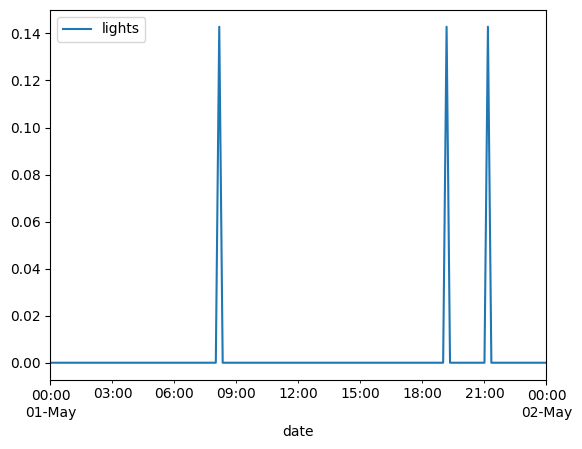

In [11]:
pd.DataFrame(datasets["test"]["lights"])[:145].plot()

In [12]:
# create timeseriesgenerator
from keras.preprocessing.sequence import TimeseriesGenerator

# in this case, we are trying to forecast the next 2 days, ie 288 steps
length = 288
batch_size = 30
epochs = 20

nn_params = {"units" : length + 1,
             "activation" : "relu",
             "input_shape" : (length, 1),
             "optimizer" : "adam",
             "loss" : "mse"}

2024-05-13 14:16:20.607676: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-13 14:16:20.607702: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-13 14:16:20.608301: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-13 14:16:20.612758: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [13]:
datasets["train"]["lights"].values.min(), datasets["train"]["lights"].values.max()

(0.0, 1.0)

In [14]:
train_lights_generator = TimeseriesGenerator(datasets["train"]["lights"], 
                                             datasets["train"]["lights"], 
                                             length=length, batch_size=batch_size)

train_lights_X, train_lights_y = train_lights_generator[0]

print(f"For array : \n{train_lights_X.flatten()}")
print(f"Predict this y : {train_lights_y}")

For array : 
[0.42857143 0.42857143 0.42857143 ... 0.         0.         0.        ]
Predict this y : [0.         0.14285714 0.         0.         0.14285714 0.
 0.14285714 0.         0.14285714 0.14285714 0.14285714 0.14285714
 0.         0.14285714 0.28571429 0.28571429 0.28571429 0.42857143
 0.28571429 0.28571429 0.28571429 0.28571429 0.28571429 0.28571429
 0.28571429 0.14285714 0.         0.         0.         0.        ]


In [15]:
# create model
from keras.models import Sequential
from keras.layers import LSTM, Dense

lights_model = Sequential()
lights_model.add(LSTM(units=nn_params["units"],
                      activation=nn_params["activation"],
                      input_shape=nn_params["input_shape"]))
lights_model.add(Dense(units=1)) # output layer
lights_model.compile(optimizer=nn_params["optimizer"], loss=nn_params["loss"])
lights_model.summary()

2024-05-13 14:16:21.990708: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-13 14:16:22.016624: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-13 14:16:22.016827: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 289)               336396    
                                                                 
 dense (Dense)               (None, 1)                 290       
                                                                 
Total params: 336686 (1.28 MB)
Trainable params: 336686 (1.28 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
# early stopping
from keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor="val_loss", patience=4)

In [17]:
# create validation generator
val_lights_gen = TimeseriesGenerator(datasets["test"]["lights"],
                                     datasets["test"]["lights"],
                                     length=length, batch_size=batch_size)

In [18]:
# fit or train the model
light_res = lights_model.fit(train_lights_generator,
                             validation_data=val_lights_gen,
                             epochs=epochs,
                             callbacks=[early_stop],
                             batch_size=batch_size)

Epoch 1/20


2024-05-13 14:16:23.977701: I external/local_xla/xla/service/service.cc:168] XLA service 0x723919606a10 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-05-13 14:16:23.977746: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
2024-05-13 14:16:23.985940: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-05-13 14:16:24.010296: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8902
I0000 00:00:1715602584.141149  261951 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


371/371 [==============================] - 72s 188ms/step - loss: 0.0072 - val_loss: 0.0027
Epoch 2/20
371/371 [==============================] - 68s 184ms/step - loss: 0.0057 - val_loss: 0.0027
Epoch 3/20
371/371 [==============================] - 70s 189ms/step - loss: 0.0056 - val_loss: 0.0027
Epoch 4/20
371/371 [==============================] - 69s 185ms/step - loss: 0.0055 - val_loss: 0.0027
Epoch 5/20
371/371 [==============================] - 69s 185ms/step - loss: 0.0056 - val_loss: 0.0025
Epoch 6/20
371/371 [==============================] - 67s 180ms/step - loss: 0.0055 - val_loss: 0.0026
Epoch 7/20
371/371 [==============================] - 66s 178ms/step - loss: 0.0055 - val_loss: 0.0025
Epoch 8/20
371/371 [==============================] - 68s 184ms/step - loss: 0.0055 - val_loss: 0.0024
Epoch 9/20
371/371 [==============================] - 69s 187ms/step - loss: 0.0054 - val_loss: 0.0025
Epoch 10/20
371/371 [==============================] - 69s 186ms/step - loss: 0.0054

<Axes: >

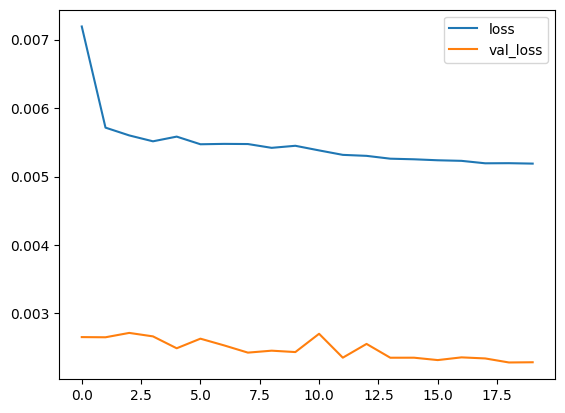

In [19]:
# plot the loss
losses = pd.DataFrame(light_res.history)
losses.plot()

In [20]:
# evaluate on test data
first_eval_batch = datasets["train"]["lights"][-length:].values
first_eval_batch = first_eval_batch.reshape((1, length, 1))
lights_model.predict(first_eval_batch)

1/1 [==============================] - 0s 148ms/step


array([[0.01690831]], dtype=float32)

In [21]:
# create test predictions
import numpy as np

test_predictions = []
first_eval_batch = datasets["train"]["lights"][-length:].values
current_batch = first_eval_batch.reshape((1, length, 1))

for i in range(len(datasets["test"]["lights"])):
    current_pred = lights_model.predict(current_batch)[0]
    test_predictions.append(current_pred)
    current_batch = np.append(current_batch[:, 1:, :], [[current_pred]], axis=1)

1/1 [==============================] - 0s 47ms/step


In [22]:
test_predictions

[array([0.01690831], dtype=float32),
 array([0.01878266], dtype=float32),
 array([0.02028005], dtype=float32),
 array([0.02023208], dtype=float32),
 array([0.01881865], dtype=float32),
 array([0.01678384], dtype=float32),
 array([0.01478176], dtype=float32),
 array([0.01328306], dtype=float32),
 array([0.01228669], dtype=float32),
 array([0.01166796], dtype=float32),
 array([0.01129776], dtype=float32),
 array([0.01108524], dtype=float32),
 array([0.01096851], dtype=float32),
 array([0.01090724], dtype=float32),
 array([0.01087653], dtype=float32),
 array([0.01086182], dtype=float32),
 array([0.01085513], dtype=float32),
 array([0.01085232], dtype=float32),
 array([0.01085138], dtype=float32),
 array([0.0108514], dtype=float32),
 array([0.01085192], dtype=float32),
 array([0.01085272], dtype=float32),
 array([0.01085367], dtype=float32),
 array([0.01085465], dtype=float32),
 array([0.0108556], dtype=float32),
 array([0.01085647], dtype=float32),
 array([0.01085723], dtype=float32),
 ar

In [23]:
# get true predictions by inverting the scaling
scaler = MinMaxScaler()
scaled_train = scaler.fit_transform(datasets["train"]["lights"].values.reshape(-1, 1))
true_predictions = scaler.inverse_transform(test_predictions)
true_predictions

array([[0.01690831],
       [0.01878266],
       [0.02028005],
       ...,
       [0.01086027],
       [0.01086027],
       [0.01086027]])

In [29]:
test_df = pd.DataFrame(datasets["test"]["lights"].values, columns=["True Light"])
test_df["Predicted Light"] = true_predictions
test_df.head()

,True Light,Predicted Light
0,0.0,0.016908
1,0.0,0.018783
2,0.0,0.020280
3,0.0,0.020232
4,0.0,0.018819


In [27]:
test_df.tail()

,True Light,Predicted Light
3848,0.000000,0.01086
3849,0.000000,0.01086
3850,0.142857,0.01086
3851,0.142857,0.01086
3852,0.142857,0.01086


<Axes: >

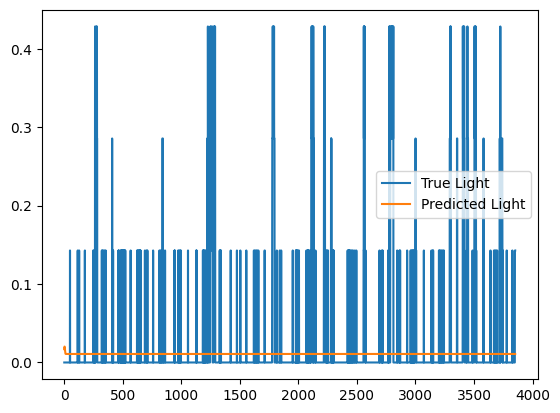

In [25]:
test_df.plot()

In [26]:
# multi = MultiRNN(dataset=df, test=None, train=None,
#                  length=None, LSTM_units=None, activation=None,
#                  optimizer=None, batch_size=None, epochs=None)